Objective ---- To identify the dataset to increase occupancy rate in low performing flight in order to increase profitability of the Airline

### Importing Libraries

In [66]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Creating database connection

In [3]:
connection=sqlite3.connect('travel.sqlite')
cursor=connection.cursor()

In [4]:
airline_data=pd.read_sql_query("select name from sqlite_master where type ='table'",connection)
airline_data

,name
0,aircrafts_data
1,airports_data
2,boarding_passes
3,bookings
4,flights
5,seats
6,ticket_flights
7,tickets


In [5]:
aircrafts_data=pd.read_sql_query("select * from aircrafts_data",connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [6]:
boarding_passes=pd.read_sql_query("select * from boarding_passes",connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [7]:
bookings=pd.read_sql_query("select * from bookings",connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [8]:
flights=pd.read_sql_query("select * from flights",connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [9]:
seats=pd.read_sql_query("select * from seats",connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [10]:
ticket_flights=pd.read_sql_query("select * from ticket_flights",connection)
ticket_flights.head()


,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [11]:
tickets=pd.read_sql_query("select * from tickets",connection)
tickets.head()


,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [12]:
for table in airline_data["name"]:
    print("\ntable",table)
    columns_info=connection.execute(f"PRAGMA table_info({table})")
    for column in columns_info.fetchall():
        print(column[1:3])


table aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4)')
('

In [13]:
for table in airline_data['name']:
    print("\ntable :",table)
    df_table=pd.read_sql_query(f"select * from {table}",connection)
    print(df_table.isnull().sum())


table : aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table : airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table : boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table : bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table : flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table : seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table : ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table : tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


### BASIC ANALYSIS

How many planes have more than 100 seats ?

In [14]:
pd.read_sql_query("""select aircraft_code,count(*) as num_seat from seats  
                              group by aircraft_code having num_seat > 100""",connection)

,aircraft_code,num_seat
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


How the number of tickerts booked and total amount earned changed with time 

In [15]:
tickets=pd.read_sql_query("""select * from tickets inner join bookings
                            on tickets.book_ref = bookings.book_ref """,connection)

In [16]:
tickets.dtypes

ticket_no       object
book_ref        object
passenger_id    object
book_ref        object
book_date       object
total_amount     int64
dtype: object

In [17]:
tickets['book_date']=pd.to_datetime(tickets['book_date'])

In [18]:
tickets.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [19]:
tickets['date']=tickets['book_date'].dt.date

In [20]:
tickets.head()

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03


In [22]:
x=tickets.groupby('date')[['date']].count()

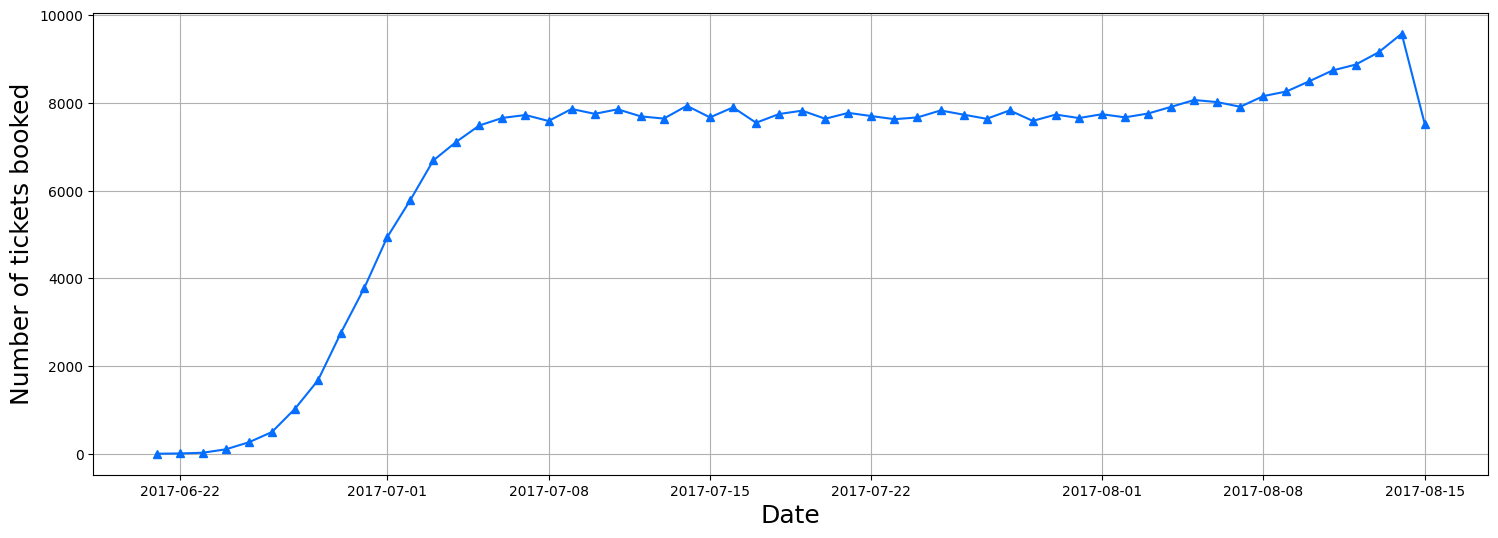

In [105]:
plt.figure(figsize=(18,6))
plt.plot(x.index,x['date'],marker='^',color="#056EFE")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Number of tickets booked",fontsize=18)
plt.grid()
plt.show()

In [54]:
booking=pd.read_sql_query("select * from bookings",connection)
bookings['book_date']=pd.to_datetime(bookings['book_date'])
bookings['date']=(bookings['book_date']).dt.date
bookings.head()

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07


In [55]:
x2=bookings.groupby('date')[["total_amount"]].sum()
x2

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


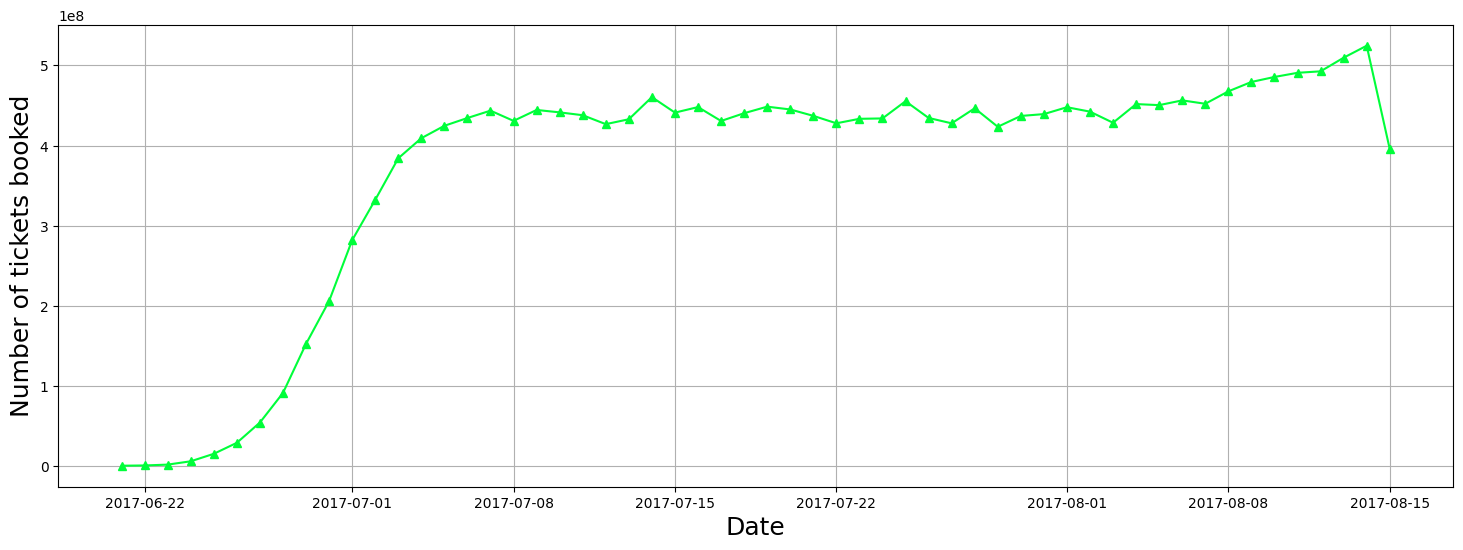

In [107]:
plt.figure(figsize=(18,6))
plt.plot(x2.index,x2['total_amount'],marker='^',color="#00FE3A")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Number of tickets booked",fontsize=18)
plt.grid()
plt.show()

Calculate the average charger for each aircraft with different fair conditions.

In [63]:
df=pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount) from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id
                            group by aircraft_code, fare_conditions""",connection)
df.head()

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

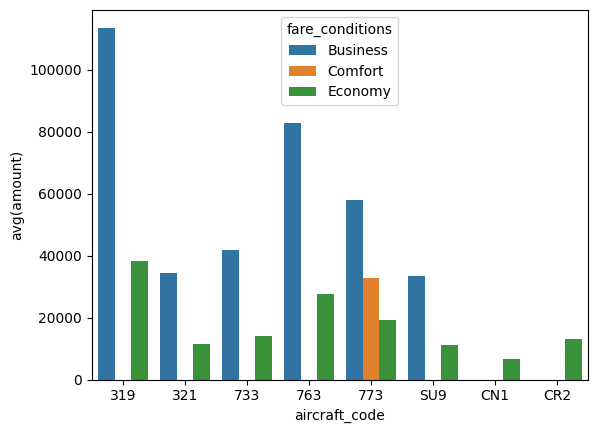

In [67]:
sns.barplot(data=df,x='aircraft_code',y='avg(amount)',hue='fare_conditions')

## Analyzing Occupancy Rate

for each aircraft, calculate the total revenue per year and average revenue per ticket

In [69]:
pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue, total_revenue/ticket_count as avg_revenue_per_year from 
(select aircraft_code,count(*) as ticket_count,sum(amount) as total_revenue from ticket_flights
                     join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code)""",connection)

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_year
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


Calculate teh average occupancy per aircraft

In [90]:
occupancy_rate=pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as booked_seats , b.num_seats , avg(a.seats_count)/b.num_seats as occupany_rate 
from 
(
select aircraft_code ,flights.flight_id , count(*) as seats_count from boarding_passes inner join
                        flights  on boarding_passes.flight_id = flights.flight_id 
                        group by aircraft_code , flights.flight_id) as a
                        inner join 
                        (select aircraft_code , count(*) as num_seats from seats group by aircraft_code) as b
                         on a.aircraft_code=b.aircraft_code group by a.aircraft_code""",connection)

occupancy_rate

,aircraft_code,booked_seats,num_seats,occupany_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


Calculate by howmuch the total annual turnover could increase by giving all aircraft a 10% higher occuapncy rate 

In [108]:
occupancy_rate['Increased Occupancy']=occupancy_rate['occupany_rate']+occupancy_rate['occupany_rate']*0.1

In [109]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupany_rate,Increased Occupancy
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [114]:

total_revenue=pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights 
                       join flights on ticket_flights.flight_id=flights.flight_id group by aircraft_code""",connection)
pd.set_option("display.float_format",str)
occupancy_rate['Inc Total Annual Turnover']=(total_revenue['total_revenue']/occupancy_rate['occupany_rate'])*occupancy_rate['Increased Occupancy']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupany_rate,Increased Occupancy,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
